In [1]:
from model import mix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
mix = mix()

/home/davies/.local/lib/python3.6/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [5]:
star1 = {'ID': 'star1', 'mass': [1.0, 0.01], 'teff': [5777.0, 50.0], 
         'logage': [np.log(4.5), .02], 'logprot': [np.log(25.5), 0.01]}

CPU times: user 19.4 s, sys: 152 ms, total: 19.6 s
Wall time: 19.2 s


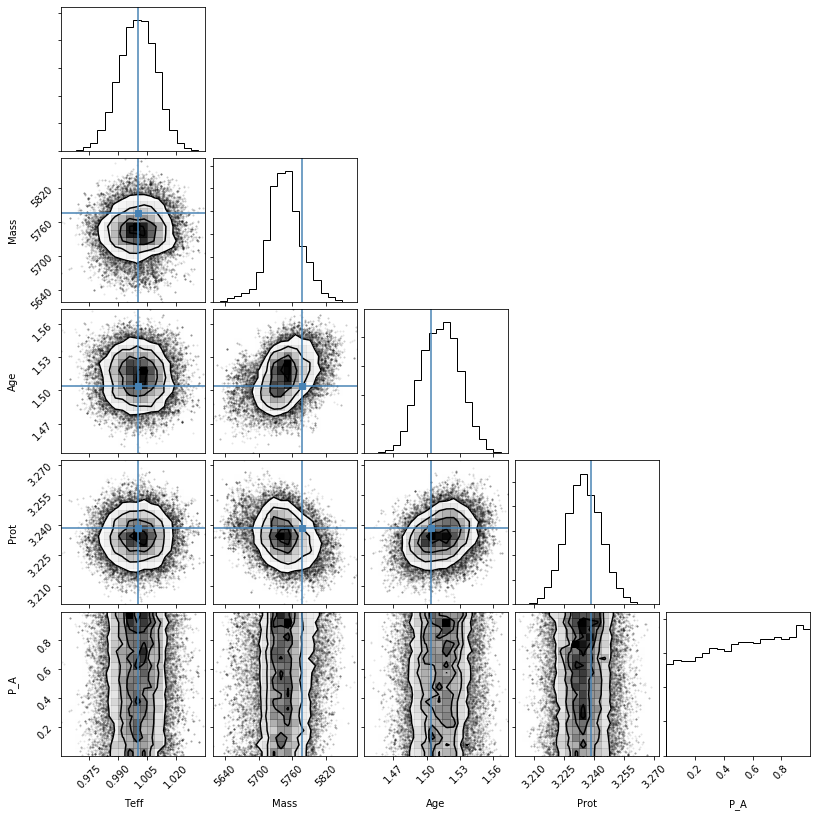

In [6]:
%%time
mix.run_one_star(star1)

In [7]:
star2 = {'ID': 'star2', 'mass': [1.0, 0.01], 'teff': [5777.0, 50.0], 
         'logage': [np.log(5.5), 0.02], 'logprot': [np.log(25.5), 0.01]}

CPU times: user 20.4 s, sys: 144 ms, total: 20.5 s
Wall time: 20.2 s


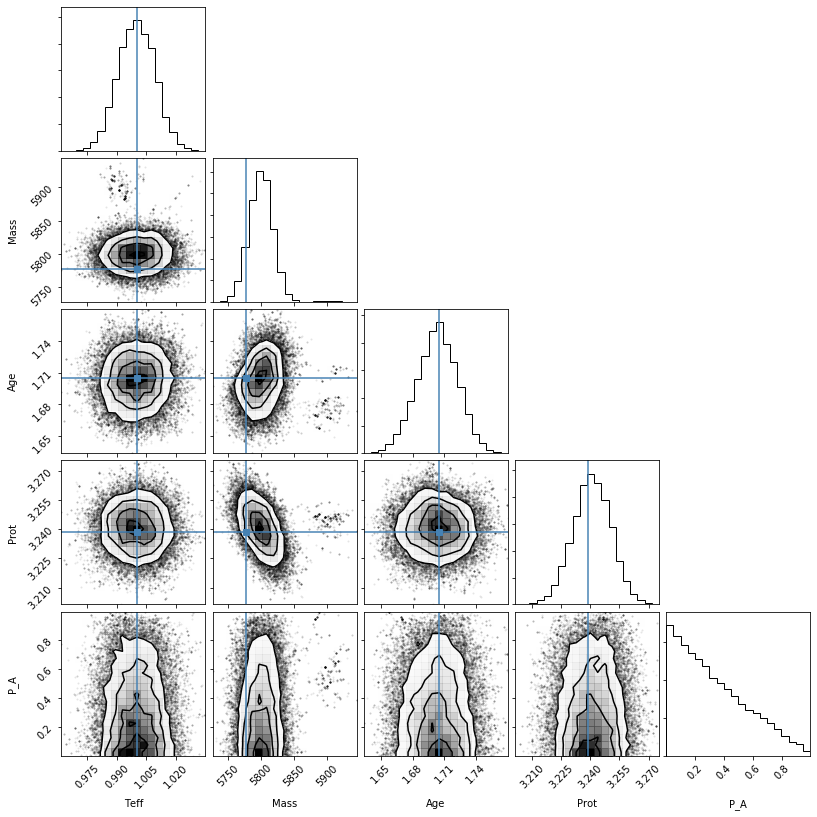

In [8]:
%%time
mix.run_one_star(star2)

In [35]:
bins = np.linspace(0, 1, 100)

In [36]:
stars = [star1, star2]
post_pa = [pd.read_csv(f"samples_{n['ID']}.csv")['P_A'] for n in stars]

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


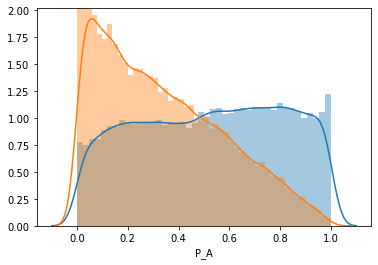

In [40]:
for pa in post_pa: 
    sns.distplot(pa)

In [42]:
hists = [np.histogram(n, bins=bins, density=True)[0] for n in post_pa]

Text(0, 0.5, 'Credibility or something')

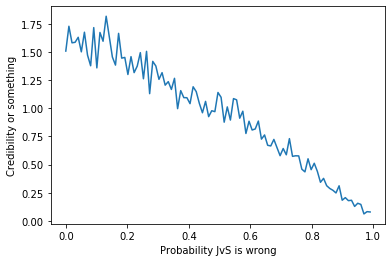

In [44]:
posterior = np.prod(hists, axis=0)
plt.plot(bins[:-1], np.prod(hists, axis=0))
plt.xlabel('Probability JvS is wrong')
plt.ylabel('Credibility or something')